#기계학습론 실습 3과제
###로봇공학과 2016007038 변진욱

In [ ]:
import pandas as pd

ip = pd.read_excel('./iPhone.xlsx')
ip.head()

,model,launching,single_bench,multi_bench,core,clock,RAM,storage,battery,mass,display,pix_width,pix_length,camera,price
0,iPhone,2007,NaN,NaN,1,0.62,0.128,4,1400,135,3.5,320,480,2.0,499
1,iPhone,2007,NaN,NaN,1,0.62,0.128,8,1400,135,3.5,320,480,2.0,599
2,iPhone 3G,2008,NaN,NaN,1,0.62,0.128,8,1150,133,3.5,320,480,2.0,599
3,iPhone 3G,2008,NaN,NaN,1,0.62,0.128,16,1150,133,3.5,320,480,2.0,699
4,iPhone 3GS,2009,NaN,NaN,1,0.60,0.256,16,1220,135,3.5,320,480,3.0,599


#feature 해설
model : 모델명

launching : 출시년도

single_bench : 코어 하나의 벤치마크 점수

multi_bench : 멀티코어의 벤치마크 점수

core : 코어 갯수(개)

clock : CPU 클럭 수(GHz)

RAM : 메모리 용량(GB)

storage : 디스크 용량(GB)

battery : 배터리 용량(mWh)

mass : 무게(g)

display : 화면 대각선 길이(inch)

pix_width : 화면 가로 픽셀 수(개)

pix_length : 화면 세로 픽셀 수(개)

camera : 카메라 화소 수(100만 개)

price : 가격 ($)
#선정 이유
스마트폰의 기본 스펙이면서, 가격에 영향을 줄 수 있는 요소들이기 때문에

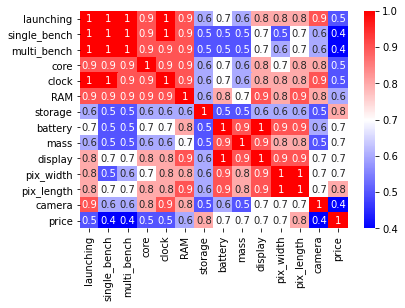

In [ ]:
correlation_matrix = ip.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

과제 계획에서는 하드웨어의 성능이 가격에 큰 영향을 미칠 것으로 예상했다. 하지만 실제 가격표에서는 디스크 용량과 화면 크기가 가장 큰 영향을 미치는 것을 알 수 있었다. 

 출시년도와 벤치마크 점수의 관계에서처럼 성능은 후속 모델에서 꾸준히 상승하지만,  가격은 후속모델과 비슷하다는 것을 알 수 있다.

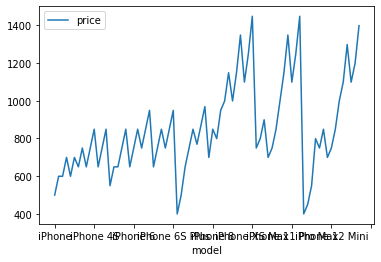

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ip.plot(x='model', y='price')

단순히 모델과 가격간의 그래프를 그렸을 때에는 동일 모델의 다른 옵션을 고려하지 못하기 때문에 분석이 쉽지 않다.

In [16]:
min = ip.loc[ip.groupby(['model'])['price'].idxmin()]
max = ip.loc[ip.groupby(['model'])['price'].idxmax()]

각 모델별 최소 가격 옵션과 최대 가격 옵션의 정보만 따로 빼서 비교한다.

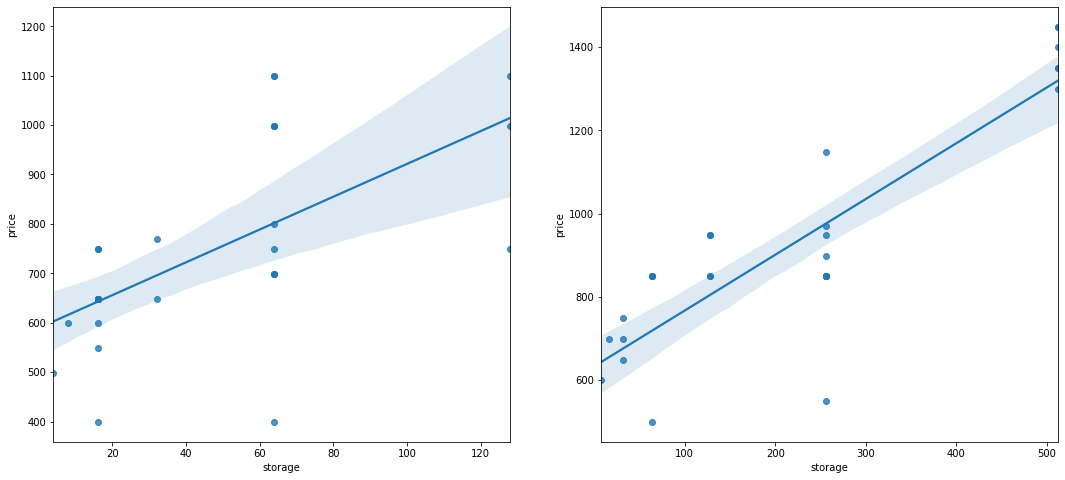

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))
sns.regplot(x='storage', y='price', data=min, ax=axs[0])
sns.regplot(x='storage', y='price', data=max, ax=axs[1])

디스크 용량 - 가격

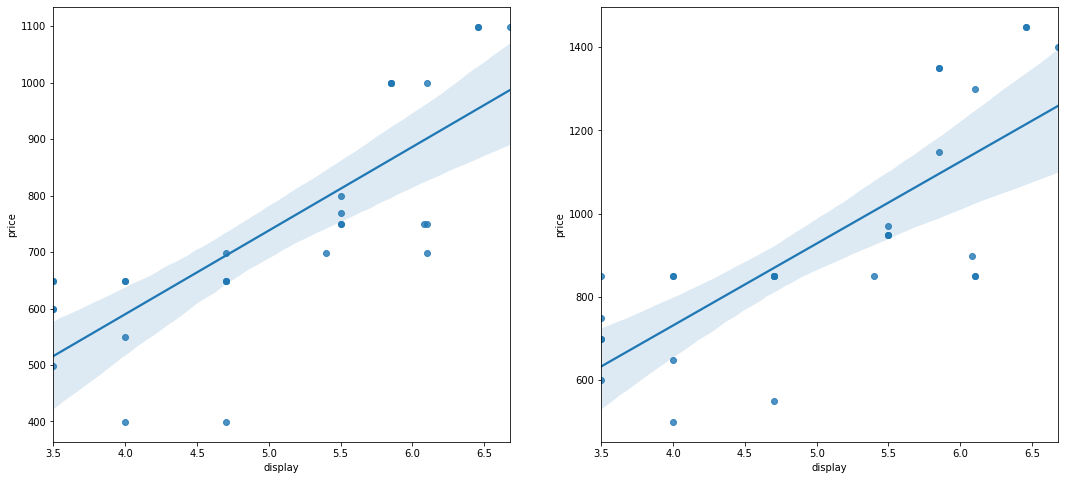

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))
sns.regplot(x='display', y='price', data=min, ax=axs[0])
sns.regplot(x='display', y='price', data=max, ax=axs[1])

화면 크기 - 가격

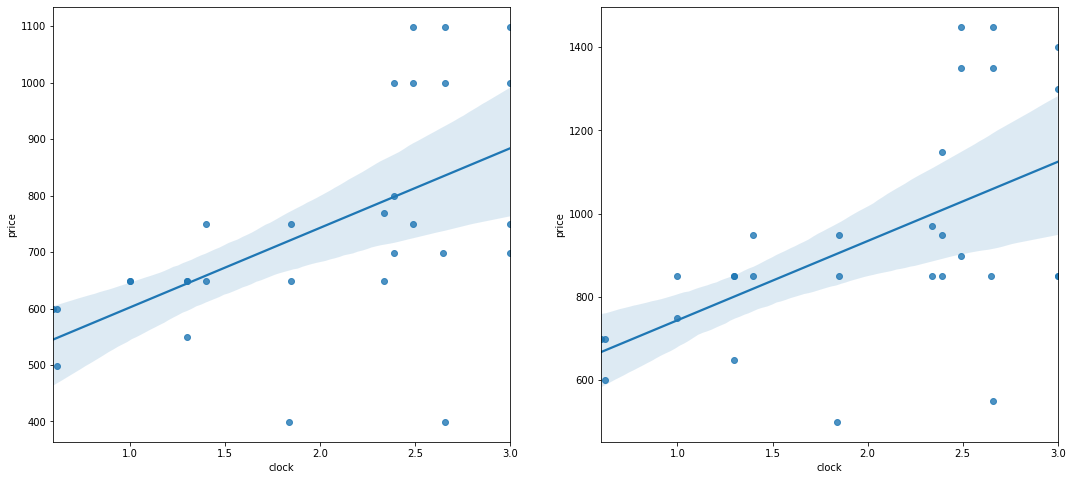

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))
sns.regplot(x='clock', y='price', data=min, ax=axs[0])
sns.regplot(x='clock', y='price', data=max, ax=axs[1])

클럭 수 - 가격

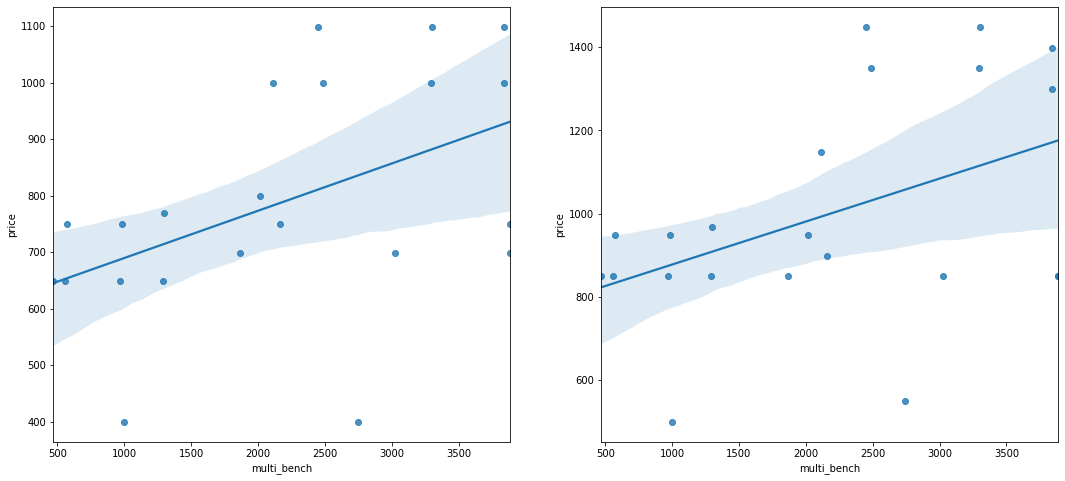

In [30]:
fig, axs = plt.subplots(ncols=2, figsize=(18,8))
sns.regplot(x='multi_bench', y='price', data=min, ax=axs[0])
sns.regplot(x='multi_bench', y='price', data=max, ax=axs[1])

멀티코어 벤치마크 점수 - 가격

##각 feature를 비교했을 때 직선 회귀에 가장 적합한 것은 화면 크기임을 알 수 있다. 아이폰의 라인업에는 넘버링 이후 S가 붙는 모델에서 화면 크기가 커지는데, 이에 대한 반영이라고 생각한다. 

##가격이 아닌 성능을 예측하는 것은 시각화로 나타내진 않았지만 히트맵에서 볼 수 있듯이 거의 일정한 수준으로 꾸준히 증가하는 것을 볼 수 있다. 프로세서의 성능이나 배터리 용량 같은 성능 정보는 충분히 예측할 수 있다고 생각한다.